In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [8]:
#pip install pmdarima

In [9]:
df  = pd.read_csv('data_new.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         373 non-null    int64  
 1   Age (Kyr ago)      373 non-null    float64
 2   BIT index          373 non-null    float64
 3   Rescaled MST (°C)  373 non-null    float64
 4   CO2 (ppmv)         373 non-null    float64
 5   δ18O               373 non-null    float64
 6   GLT_syn            373 non-null    float64
 7   d18O_benthic       373 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 23.4 KB


In [11]:
scaler_poly = StandardScaler()

(373, 8)


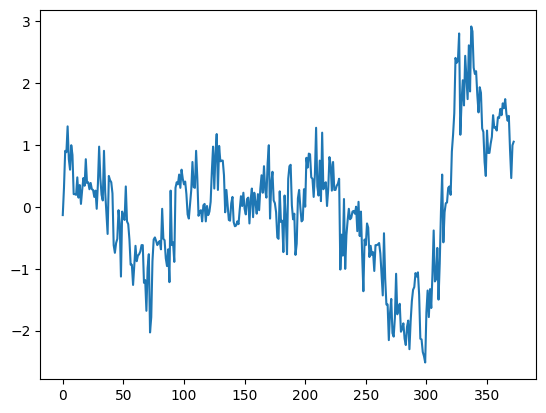

In [34]:
input_data = df.to_numpy()
scaled_input = scaler_poly.fit_transform(input_data)
age = df[df.columns[1]].to_numpy()
print(scaled_input.shape)
mst = scaled_input[:, 3][:: -1]
plt.plot(mst)

In [35]:
optimal = auto_arima(mst, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
p , d, q = optimal.order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=392.901, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1060.528, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=439.274, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=773.988, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=394.570, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=394.768, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=394.163, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=394.260, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=393.300, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=394.368, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=394.405, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=396.009, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=394.843, Time=0.40 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 1.510 seconds


In [36]:
print(p, d , q)

2 0 2


In [37]:
n = mst.shape[0]
print(n)
y_train1 = mst[0 : 336]
y_test1 = mst[336 : ]

history = [x for x in y_train1]
# make first prediction
predictions1 = list()
model = ARIMA(history, order=(p,d,q))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions1.append(yhat)
history.append(yhat)

373


In [38]:
for i in range(1, len(y_test1)):
    # predict
    #optimal = auto_arima(history, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    #p , d, q = optimal.order
    #print(p, d, q)
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions1.append(yhat)
    # observation
    obs = yhat
    history.append(obs)

In [39]:
print(len(history))
print(len(predictions1))

373
37


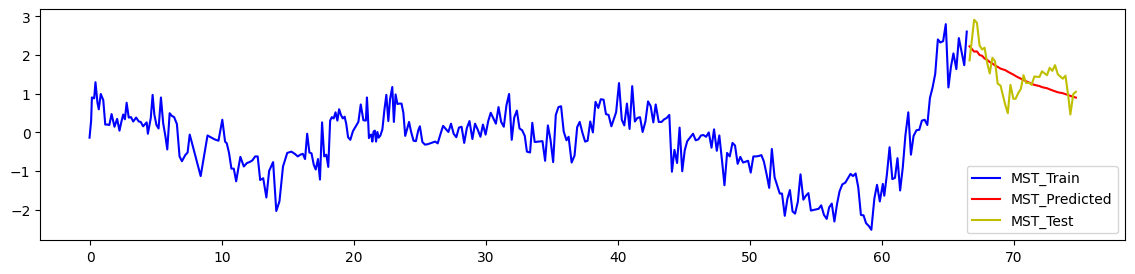

In [40]:
plt.figure(figsize=(14,3))
plt.plot(age[: 336], y_train1, color = 'b', label = 'MST_Train')
plt.plot(age[336:  ], predictions1, color = 'r', label = 'MST_Predicted')
plt.plot(age[336:  ], y_test1, color = 'y', label = 'MST_Test')
plt.legend()
plt.savefig("MST_test.png")


In [41]:
future_MST = []
history2  = [x for x in mst]
for i in range(10):
    # predict
    #optimal = auto_arima(history, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    #p , d, q = optimal.order
    #print(p, d, q)
    model = ARIMA(history2, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    future_MST.append(yhat)
    # observation
    obs = yhat
    history2.append(obs)

/home/abdu924/myvirtual/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/abdu924/myvirtual/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.9154427484199522, 0.9124299188835068, 0.8750619623576936, 0.862870453756122, 0.8342004384946117, 0.8180840552265513, 0.7941690639577224, 0.7767381036304749, 0.7557773065853504, 0.7381904246003492]


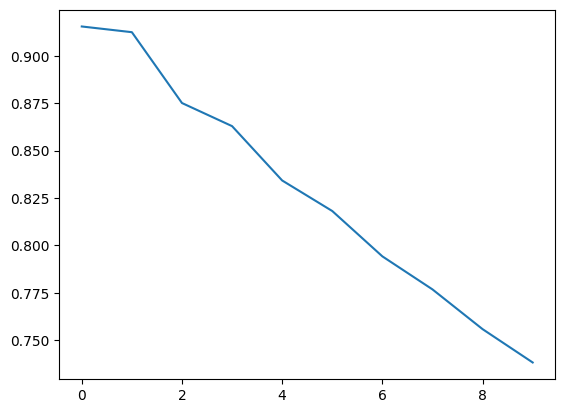

In [42]:
print(future_MST)
plt.plot(future_MST)

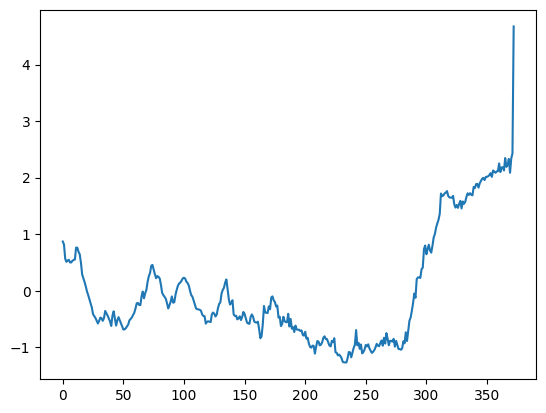

In [44]:
co2 = scaled_input[:, 4][:: -1]
plt.plot(co2)

In [45]:
optimal = auto_arima(co2, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
p , d, q = optimal.order

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-242.331, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-332.950, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-243.859, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-334.611, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-347.431, Time=0.13 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-355.031, Time=0.26 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-353.281, Time=0.29 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-358.651, Time=0.61 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-362.995, Time=0.50 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-361.465, Time=0.52 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=-356.540, Time=0.58 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-362.3

In [46]:
print(p ,d, q)

3 2 1


In [47]:
n = co2.shape[0]
print(n)
y_train2 = co2[0 : 336]
y_test2 = co2[336 : ]

history = [x for x in y_train2]
# make first prediction
predictions2 = list()
model = ARIMA(history, order=(p,d,q))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions2.append(yhat)
history.append(yhat)

373


In [48]:
for i in range(1, len(y_test2)):
    # predict
    #optimal = auto_arima(history, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    #p , d, q = optimal.order
    #print(p, d, q)
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions2.append(yhat)
    # observation
    obs = yhat
    history.append(obs)

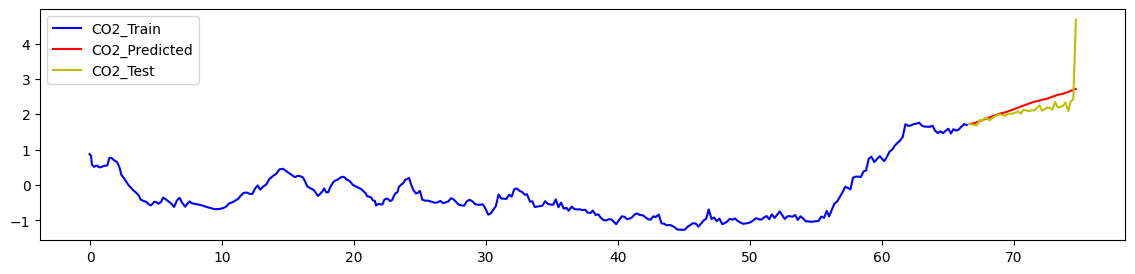

In [49]:
plt.figure(figsize=(14,3))
plt.plot(age[: 336], y_train2, color = 'b', label = 'CO2_Train')
plt.plot(age[336:  ], predictions2, color = 'r', label = 'CO2_Predicted')
plt.plot(age[336:  ], y_test2, color = 'y', label = 'CO2_Test')
plt.legend()

In [50]:
future_co2 = []
history2 = [x for x in co2]
for i in range(10):
    # predict
    #optimal = auto_arima(history, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    #p , d, q = optimal.order
    #print(p, d, q)
    model = ARIMA(history2, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    future_co2.append(yhat)
    # observation
    obs = yhat
    history2.append(obs)

/home/abdu924/myvirtual/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.807034020039864, 5.418299922609263, 5.234764366512969, 5.43959356814977, 5.398479429864013, 5.55484968456671, 5.603530944551424, 5.730822496114077, 5.806864205368503, 5.915355714501397]


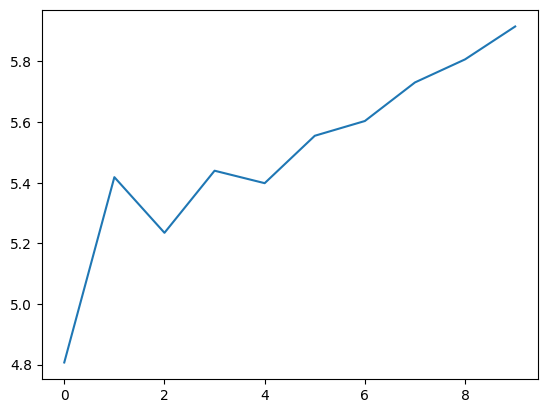

In [51]:
print(future_co2)
plt.plot(future_co2)

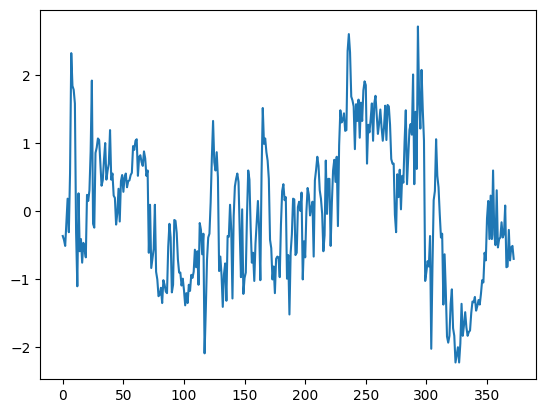

In [52]:
d18O = scaled_input[:, 5][:: -1]
plt.plot(d18O)

In [53]:
optimal = auto_arima(d18O, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
p , d, q = optimal.order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=599.305, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1060.528, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=610.117, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=831.864, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=598.386, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=737.661, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=596.546, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=598.290, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=597.879, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=598.532, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.571 seconds


In [54]:
n = d18O.shape[0]
print(n)
y_train3 = d18O[0 : 336]
y_test3 = d18O[336 : ]

history = [x for x in y_train3]
# make first prediction
predictions3 = list()
model = ARIMA(history, order=(p,d,q))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions3.append(yhat)
history.append(yhat)

373


In [55]:
for i in range(1, len(y_test3)):
    # predict
    #optimal = auto_arima(history, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    #p , d, q = optimal.order
    #print(p, d, q)
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions3.append(yhat)
    # observation
    obs = yhat
    history.append(obs)

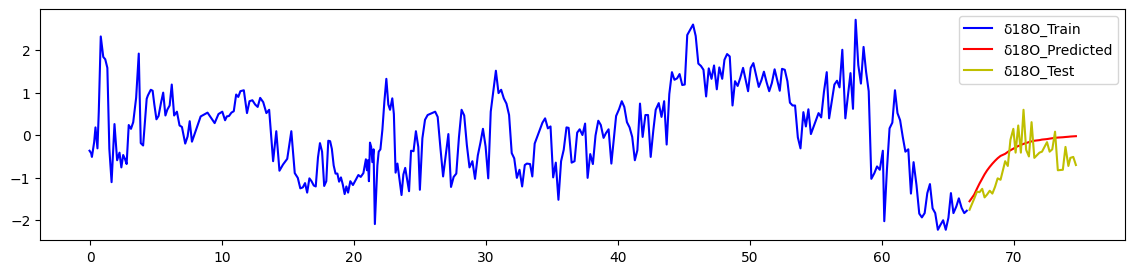

In [56]:
plt.figure(figsize=(14,3))
plt.plot(age[: 336], y_train3, color = 'b', label = 'δ18O_Train')
plt.plot(age[336:  ], predictions3, color = 'r', label = 'δ18O_Predicted')
plt.plot(age[336:  ], y_test3, color = 'y', label = 'δ18O_Test')
plt.legend()

In [57]:
future_d18O = []
history2 = [x for x in d18O]
for i in range(10):
    # predict
    #optimal = auto_arima(history, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    #p , d, q = optimal.order
    #print(p, d, q)
    model = ARIMA(history2, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    future_d18O.append(yhat)
    # observation
    obs = yhat
    history2.append(obs)

[-0.5799299522897654, -0.528899214737691, -0.4825671569005122, -0.44049849348603065, -0.40230406340129676, -0.3676260909982129, -0.33613920416424276, -0.3075484317589328, -0.28158913390761636, -0.2580164041416915]


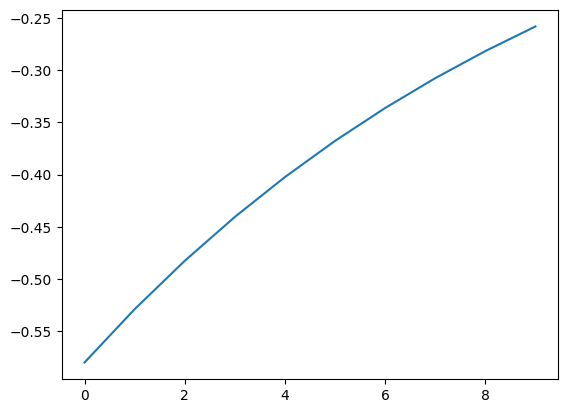

In [58]:
print(future_d18O)
plt.plot(future_d18O)

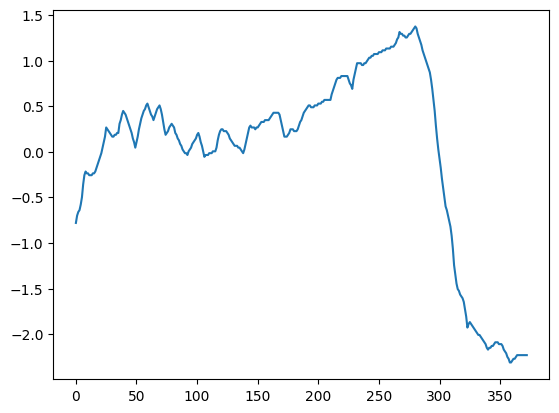

In [59]:
B18O = scaled_input[:, 7][:: -1]
plt.plot(B18O)

In [60]:
optimal = auto_arima(B18O, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
p , d, q = optimal.order

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-1635.190, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1599.230, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1612.340, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-1611.162, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1601.208, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-1629.335, Time=0.29 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-1609.891, Time=0.32 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-1633.876, Time=0.49 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-1640.635, Time=0.46 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-1644.161, Time=0.41 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-1624.665, Time=0.60 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-1647.420, Time=0.47 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-1640.552, Time=0.45 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : AIC=-1641.366, Time=0.80 sec
 ARIMA(1,2,5)(0,0,0

In [61]:
n = B18O.shape[0]
print(n)
y_train4 = B18O[0 : 336]
y_test4 = B18O[336 : ]

history = [x for x in y_train4]
# make first prediction
predictions4 = list()
model = ARIMA(history, order=(p,d,q))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions4.append(yhat)
history.append(yhat)

373


In [62]:
for i in range(1, len(y_test4)):
    # predict
    #optimal = auto_arima(history, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    #p , d, q = optimal.order
    #print(p, d, q)
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions4.append(yhat)
    # observation
    obs = yhat
    history.append(obs)

/home/abdu924/myvirtual/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abdu924/myvirtual/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abdu924/myvirtual/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abdu924/myvirtual/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abdu924/myvirtual/lib/python3.11/site-packages/statsmo

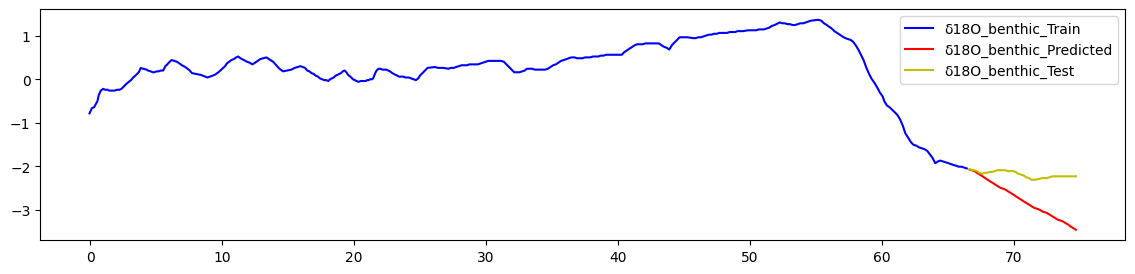

In [63]:
plt.figure(figsize=(14,3))
plt.plot(age[: 336], y_train4, color = 'b', label = 'δ18O_benthic_Train')
plt.plot(age[336:  ], predictions4, color = 'r', label = 'δ18O_benthic_Predicted')
plt.plot(age[336:  ], y_test4, color = 'y', label = 'δ18O_benthic_Test')
plt.legend()
plt.savefig("δ18O_benthic_test.png")

In [64]:
future_B18O = []
history2 = [x for x in B18O]
for i in range(10):
    # predict
    #optimal = auto_arima(history, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    #p , d, q = optimal.order
    #print(p, d, q)
    model = ARIMA(history2, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    future_B18O.append(yhat)
    # observation
    obs = yhat
    history2.append(obs)

In [65]:
print(np.round(future_B18O, 3))

[-2.232 -2.234 -2.237 -2.24  -2.243 -2.247 -2.251 -2.254 -2.258 -2.261]


In [66]:
future_data = np.stack((future_MST, future_co2, future_d18O, future_B18O), axis = 1)

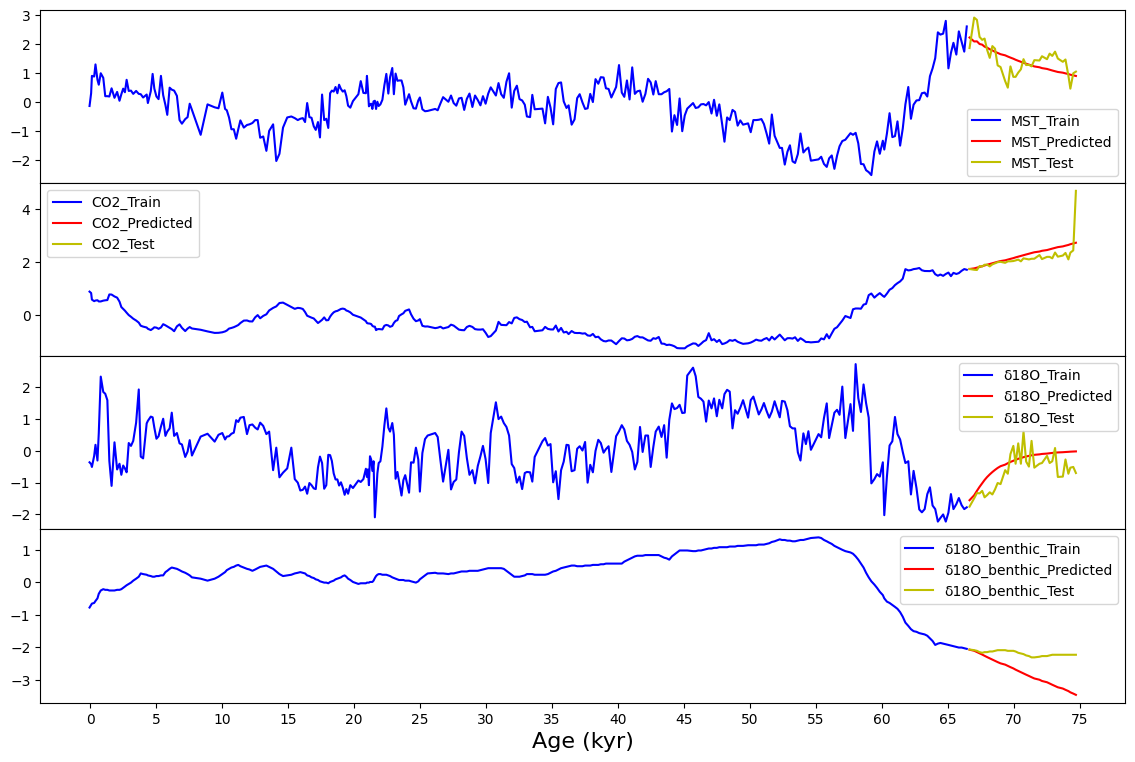

In [67]:
fig = plt.figure(figsize=(14,9))
fig.tight_layout()
fig.subplots_adjust(hspace=0.0001)
plt.subplot(411)
plt.plot(age[: 336], y_train1, color = 'b', label = 'MST_Train')
plt.plot(age[336:  ], predictions1, color = 'r', label = 'MST_Predicted')
plt.plot(age[336:  ], y_test1, color = 'y', label = 'MST_Test')
plt.legend()
plt.xticks([])
plt.legend()
plt.subplot(412)
plt.plot(age[: 336], y_train2, color = 'b', label = 'CO2_Train')
plt.plot(age[336:  ], predictions2, color = 'r', label = 'CO2_Predicted')
plt.plot(age[336:  ], y_test2, color = 'y', label = 'CO2_Test')
plt.legend()
plt.xticks([])
plt.legend()
plt.subplot(413)
plt.plot(age[: 336], y_train3, color = 'b', label = 'δ18O_Train')
plt.plot(age[336:  ], predictions3, color = 'r', label = 'δ18O_Predicted')
plt.plot(age[336:  ], y_test3, color = 'y', label = 'δ18O_Test')
plt.legend()
plt.xticks([])
plt.subplot(414)
plt.plot(age[: 336], y_train4, color = 'b', label = 'δ18O_benthic_Train')
plt.plot(age[336:  ], predictions4, color = 'r', label = 'δ18O_benthic_Predicted')
plt.plot(age[336:  ], y_test4, color = 'y', label = 'δ18O_benthic_Test')
plt.xticks(range(0, 80, 5))
plt.xlabel('Age (kyr)', fontsize = 16)
plt.legend()
plt.savefig("Arima_test.png") 
plt.show()

In [68]:
column_values = ['Rescaled MST (°C)','CO2 (ppmv) ','δ18O ','d18O_benthic']

In [69]:
future_data.shape

(10, 4)

In [70]:
df = pd.DataFrame(data = future_data,   
                  columns = column_values)

In [71]:
df.to_csv("future_data.csv")